## Import Libraries

In [1]:
import numpy as np 
import pandas as pd
from tqdm import tqdm
from glob import glob
from keras.layers import *
from keras.models import *
from keras.utils import *
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# To display image
from PIL import Image

## Data Loading and Inspection

In [2]:
# Check the number of training images
num_images_train_normal = len(os.listdir("../input/chest-xray-pneumonia/chest_xray/train/NORMAL"))
num_images_train_pneumonia = len(os.listdir("../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA"))

num_images_train_normal, num_images_train_pneumonia

(1341, 3875)

In [3]:
# Getting the class names
import pathlib
import numpy as np
data_dir = pathlib.Path("../input/chest-xray-pneumonia/chest_xray/train/") # Turns training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Creates a list of class_names from the subdirectories
print(class_names)

['NORMAL' 'PNEUMONIA']


In [4]:
# Function to view an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (1210, 1634)


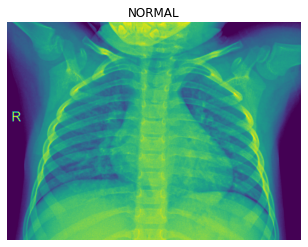

In [5]:
# View a random image from the training dataset (Normal) 
img = view_random_image(target_dir="../input/chest-xray-pneumonia/chest_xray/train/",
                        target_class="NORMAL")

Image shape: (976, 1096)


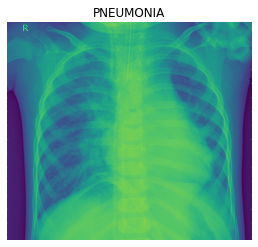

In [6]:
# View a random image from the training dataset (Pneumonia)
img = view_random_image(target_dir="../input/chest-xray-pneumonia/chest_xray/train/",
                        target_class="PNEUMONIA")

In [7]:
type(img)

numpy.ndarray

## Convert data to numpy array

In [8]:
# Convert normal training images to single numpy array
image_dir = '../input/chest-xray-pneumonia/chest_xray/train/NORMAL'
# make a list of all the images
imageList = os.listdir(image_dir)

# create a placeholder array
x = np.ndarray(shape=(len(imageList),128,128,1), dtype=np.float32)

for i in range(len(imageList)):
      # open image to numpy array
      img = cv2.imread('../input/chest-xray-pneumonia/chest_xray/train/NORMAL/' + imageList[i])

      # do all the pre-processing…
      img = cv2.resize(img, dsize=(128,128), interpolation=cv2.INTER_CUBIC)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img = np.expand_dims(img, axis=-1)

      # insert into placeholder array
      x[i] = img

# write placeholder array into a binary npy file
np.save('train_normal.npy', x)

In [9]:
train_normal = np.load('train_normal.npy')
train_normal.shape

(1341, 128, 128, 1)

In [10]:
# Convert pneumonia training images to single numpy array
image_dir = '../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA'
# make a list of all the images
imageList = os.listdir(image_dir)

# create a placeholder array
x = np.ndarray(shape=(len(imageList),128,128,1), dtype=np.float32)

for i in range(len(imageList)):
      # open image to numpy array
      img = cv2.imread('../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/' + imageList[i])

      # do all the pre-processing…
      img = cv2.resize(img, dsize=(128,128), interpolation=cv2.INTER_CUBIC)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img = np.expand_dims(img, axis=-1)

      # insert into placeholder array
      x[i] = img

# write placeholder array into a binary npy file
np.save('train_pneumonia.npy', x)

In [11]:
train_pneumonia = np.load('train_pneumonia.npy')
train_pneumonia.shape

(3875, 128, 128, 1)

In [12]:
label_normal = np.zeros(len(train_normal))
label_pneumonia = np.ones(len(train_pneumonia))

In [13]:
train_data = np.concatenate((train_normal, train_pneumonia),axis=0)
train_label = np.concatenate((label_normal,label_pneumonia),axis=0)
train_label.shape, train_data.shape

((5216,), (5216, 128, 128, 1))

In [14]:
# Convert normal test images to single numpy array
image_dir = '../input/chest-xray-pneumonia/chest_xray/test/NORMAL'
# make a list of all the images
imageList = os.listdir(image_dir)

# create a placeholder array
x = np.ndarray(shape=(len(imageList),128,128,1), dtype=np.float32)

for i in range(len(imageList)):
      # open image to numpy array
      img = cv2.imread('../input/chest-xray-pneumonia/chest_xray/test/NORMAL/' + imageList[i])
      # do all the pre-processing…
      img = cv2.resize(img, dsize=(128,128), interpolation=cv2.INTER_CUBIC)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img = np.expand_dims(img, axis=-1)

      # insert into placeholder array
      x[i] = img

# write placeholder array into a binary npy file
np.save('test_normal.npy', x)

In [15]:
test_normal = np.load('test_normal.npy')
test_normal.shape

(234, 128, 128, 1)

In [16]:
# Convert pneumonia test images to single numpy array
image_dir = '../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA'
# make a list of all the images
imageList = os.listdir(image_dir)

# create a placeholder array
x = np.ndarray(shape=(len(imageList),128,128,1), dtype=np.float32)

# loop through all images
for i in range(len(imageList)):
      # open image to numpy array
      img = cv2.imread('../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/' + imageList[i])
     
      # do all the pre-processing…
      img = cv2.resize(img, dsize=(128,128), interpolation=cv2.INTER_CUBIC)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img = np.expand_dims(img, axis=-1)

      # insert into placeholder array
      x[i] = img

# write placeholder array into a binary npy file
np.save('test_pneumonia.npy', x)

In [17]:
test_pneumonia = np.load('test_pneumonia.npy')
test_pneumonia.shape

(390, 128, 128, 1)

In [18]:
label_normal_test = np.zeros(len(test_normal))
label_pneumonia_test = np.ones(len(test_pneumonia))

In [19]:
test_data = np.concatenate((test_normal, test_pneumonia),axis=0)
test_label = np.concatenate((label_normal_test,label_pneumonia_test),axis=0)
test_label.shape, test_data.shape

((624,), (624, 128, 128, 1))

In [20]:
from keras.utils import to_categorical
train_label = to_categorical(train_label, num_classes= 2)
test_label  = to_categorical(test_label, num_classes = 2)

## Visualize Data

100%|██████████| 3/3 [00:00<00:00, 229.33it/s]


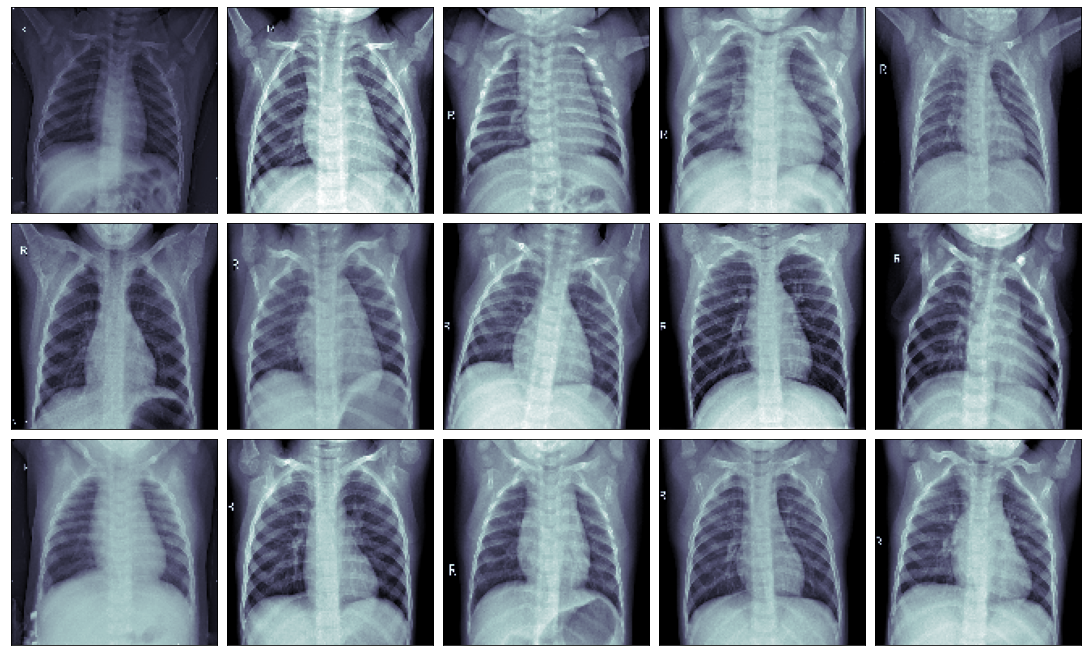

In [21]:
# Train Normal Images
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(train_normal[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

100%|██████████| 3/3 [00:00<00:00, 199.61it/s]


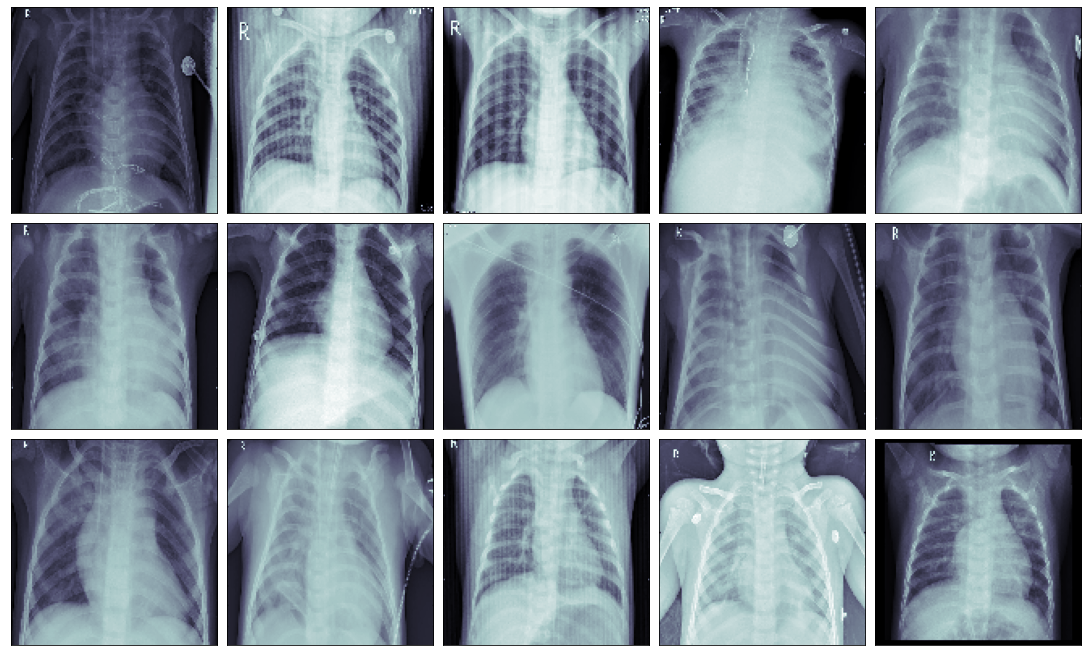

In [22]:
# Train Pneumonia Images
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(train_pneumonia[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

100%|██████████| 3/3 [00:00<00:00, 197.66it/s]


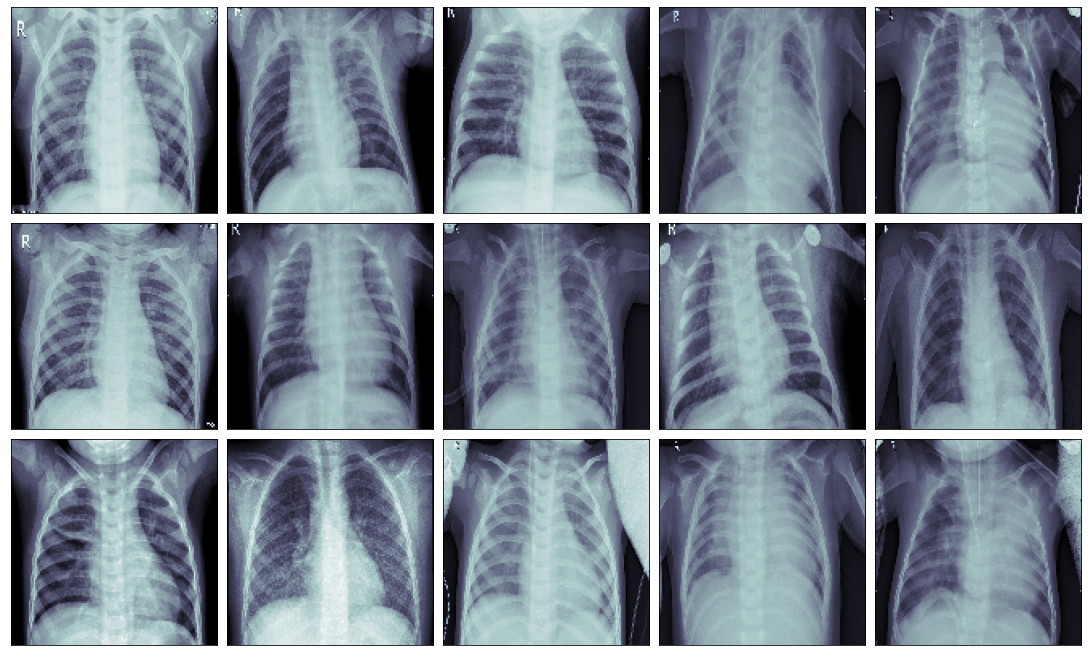

In [23]:
# Test Pneumonia Images
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(test_pneumonia[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

100%|██████████| 3/3 [00:00<00:00, 196.78it/s]


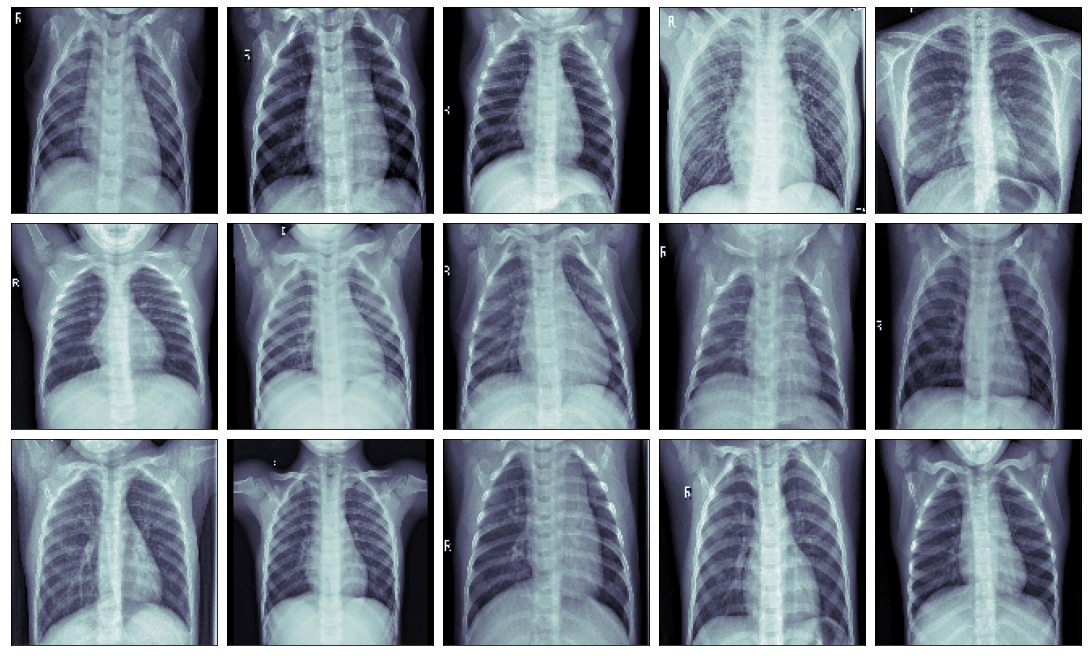

In [24]:
# Test Normal Images
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(test_normal[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

## Image Augmentation

In [25]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import *


train_datagen = ImageDataGenerator(rescale = 1/255,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1,
                                  fill_mode = 'constant',
                                  zoom_range = 0.2,
                                  rotation_range = 30)

val_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow(train_data,
                                     train_label, 
                                     batch_size = 16, 
                                     shuffle = True)

val_generator = val_datagen.flow(test_data,
                                 test_label,
                                 batch_size = 16,
                                 shuffle = False)

In [26]:
images, labels = train_generator.next()

## Model Architecture

In [27]:
def Residual_Unit(input_tensor, nb_of_input_channels, max_dilation, number_of_units):
    
  for i in range(number_of_units):
    x1 = Conv2D(nb_of_input_channels*2, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(input_tensor)
    x1 = BatchNormalization()(x1)
  
    a = []

    for i in range(1, max_dilation+1):
      temp = DepthwiseConv2D( kernel_size=(3,3), dilation_rate = (i,i), padding = 'same', activation= 'relu')(x1)
      temp = BatchNormalization()(temp)
      a.append(temp)

    x = Concatenate(axis= -1)(a)
    x = Conv2D(nb_of_input_channels, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(x)
    x = BatchNormalization()(x)

    x = Add()([x, input_tensor])

    input_tensor = x
  
  return x

In [28]:
# Shifter Unit:

def Shifter_Unit(input_tensor, nb_of_input_channels, max_dilation):
    x1 = Conv2D(nb_of_input_channels*4, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(input_tensor)
    x1 = BatchNormalization()(x1)

    a = []

    for i in range(1, max_dilation+1):
      temp = DepthwiseConv2D( kernel_size=(3,3), dilation_rate = (i,i), padding = 'same', activation= 'relu')(x1)
      temp = MaxPool2D(pool_size=(2,2))(temp)
      temp = BatchNormalization()(temp)
      a.append(temp)

    x = Concatenate(axis= -1)(a)

    x = Conv2D(nb_of_input_channels*2, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(x)
    x = BatchNormalization()(x)

    return x

In [29]:
from keras.optimizers import Adam

In [30]:
#Network:
  
def Network128(input_shape, nb_class, depth):
  xin = Input(shape= input_shape)

  x = Conv2D(16, kernel_size = (5,5), strides= (1,1), padding = 'same', activation='relu')(xin)
  x = BatchNormalization()(x)

  x = Conv2D(32, kernel_size = (3,3), strides= (2,2), padding = 'same', activation='relu')(x)
  x = BatchNormalization()(x)
  
##Max Dilation rate will be vary in the range (1,5). 

# Max Dilation rate is 5 for tensor (64x64x32)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=32, max_dilation=5, number_of_units=depth)
  x = Shifter_Unit(input_tensor=x, nb_of_input_channels=32, max_dilation=5)


# Max Dilation rate is 4 for (32x32x64)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=64, max_dilation=4, number_of_units=depth)
  x = Shifter_Unit(input_tensor=x, nb_of_input_channels=64, max_dilation=4)

# Max Dilation rate is 3 for (16x16x128)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=128, max_dilation=3, number_of_units=depth)
  x = Shifter_Unit(input_tensor=x, nb_of_input_channels=128, max_dilation=3)

# Max Dilation rate is 2 for (8x8x256)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=256, max_dilation=2, number_of_units=depth)

  x = GlobalAveragePooling2D()(x)

  x = Dense(128, activation='relu')(x)
  x = Dense(64, activation='relu')(x)

  x = Dense(1, activation= 'sigmoid')(x)

  model = Model(xin, x)

  model.compile(loss='binary_crossentropy', optimizer = Adam(lr=0.01), metrics = ['accuracy'])

  return model

In [31]:
from keras.utils import to_categorical
train_label = to_categorical(train_label, num_classes= 2)
test_label  = to_categorical(test_label, num_classes = 2)

In [32]:
model = Network128(input_shape = (128, 128, 1), nb_class = 2, depth = 5)
model.summary() 

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 416         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 32)   4640        batch_normalization[0][0]        
______________________________________________________________________________________________

## Train Model

In [33]:
history = model.fit(train_generator,
                    steps_per_epoch = len(train_data) // 16,
                    validation_data=val_generator,
                    validation_steps= len(test_data)// 16,          
                    epochs = 10,
                    verbose = 1)

Epoch 1/10
326/326 [==============================] - 205s 559ms/step - loss: 0.7650 - accuracy: 0.5000 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 2/10
326/326 [==============================] - 178s 547ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/10
326/326 [==============================] - 178s 547ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.7042 - val_accuracy: 0.5000
Epoch 4/10
326/326 [==============================] - 178s 547ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.7025 - val_accuracy: 0.5000
Epoch 5/10
326/326 [==============================] - 178s 547ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6954 - val_accuracy: 0.5000
Epoch 6/10
326/326 [==============================] - 178s 547ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6956 - val_accuracy: 0.5000
Epoch 7/10
326/326 [==============================] - 178s 547ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6933 -